# README: Benefit of Sharing nodes.
* This notebook captures simulates silo runs of three clusters
    * HPC: cluster-size = 95 nodes
    * Bigdata: cluster-size = 26 nodes
    * Cloud: cluster-size = 20 nodes
    
* Overall the clusters need 95 nodes when running independently as 'silos' to fullfill their job requests.
* Ideally the same workload can be fulfilled with almost half the capacity (42 nodes) if they co-operate with each other.
* TODO: How close can FLOCX come to this number ?


In [1]:
import pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import nbinom
import math

def core_usage_graph(data, title):
    coreusage = data[['timestamp', 'cores_owned', 'cores_cur_cap', 'cores_inuse', 'cores_indemand']]
    ax = coreusage.set_index('timestamp').plot(figsize=(20, 5))
    plt.xlabel('time interval in seconds', fontsize=16)
    plt.ylabel('No of cores', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(loc='best', fontsize=14)
    plt.grid()
    plt.show()

def node_usage_graph(data, title):
    nodeusage = data[['timestamp', 'nodes_owned', 'nodes_cur_cap', 'nodes_inuse', 'nodes_indemand']]
    ax = nodeusage.set_index('timestamp').plot(figsize=(20, 5))
    plt.xlabel('time interval in seconds', fontsize=16)
    plt.ylabel('No of nodes', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.grid()
    plt.show()
    
    
foldername="Silo_exactVar_95Nodes_run02"

In [2]:

bgd_main = pd.read_csv(foldername+'/bigdata_main_all_output.csv')

cld_main = pd.read_csv(foldername+'/cloud50_all_output.csv')

hpc_main = pd.read_csv(foldername+'/hpc_main_all_output.csv')




In [3]:
bgd_main.head()

,timestamp,cluster,nodes_owned,nodes_borrowed,nodes_offered,nodes_cur_cap,nodes_inuse,nodes_indemand,jobs_waiting,jobs_running,jobs_done,jobs_rerun,cores_owned,cores_cur_cap,cores_inuse,cores_indemand
0,0,bigdata_main,26,0,0,26,0,0,0,0,0,0,624,624,0,NaN
1,1,bigdata_main,26,0,0,26,0,0,0,0,0,0,624,624,0,NaN
2,2,bigdata_main,26,0,0,26,0,0,0,0,0,0,624,624,0,NaN
3,3,bigdata_main,26,0,0,26,0,0,0,0,0,0,624,624,0,NaN
4,4,bigdata_main,26,0,0,26,0,0,0,0,0,0,624,624,0,NaN


In [4]:
hpc_main.head()

,timestamp,cluster,nodes_owned,nodes_borrowed,nodes_offered,nodes_cur_cap,nodes_inuse,nodes_indemand,jobs_waiting,jobs_running,jobs_done,jobs_rerun,cores_owned,cores_cur_cap,cores_inuse,cores_indemand
0,0,hpc_main,49,0,0,49,1,0,0,1,0,0,1176,1176,24,NaN
1,1,hpc_main,49,0,0,49,1,0,0,1,0,0,1176,1176,24,NaN
2,2,hpc_main,49,0,0,49,1,0,0,1,0,0,1176,1176,24,NaN
3,3,hpc_main,49,0,0,49,1,0,0,1,0,0,1176,1176,24,NaN
4,4,hpc_main,49,0,0,49,1,0,0,1,0,0,1176,1176,24,NaN


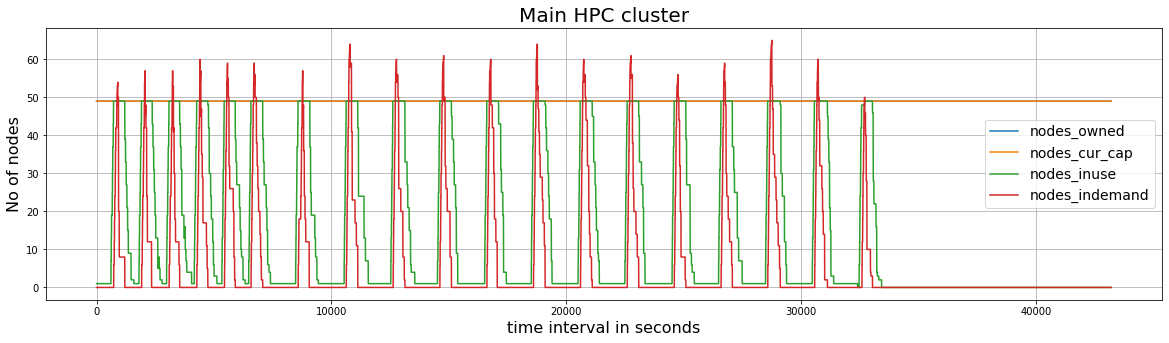

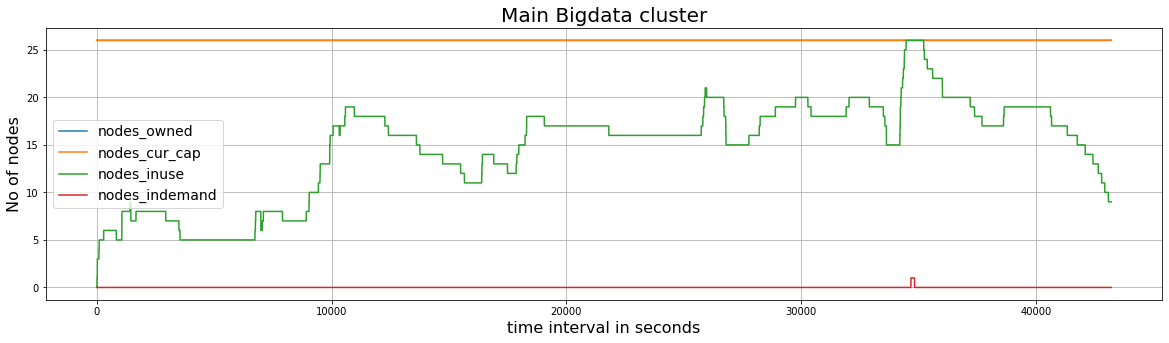

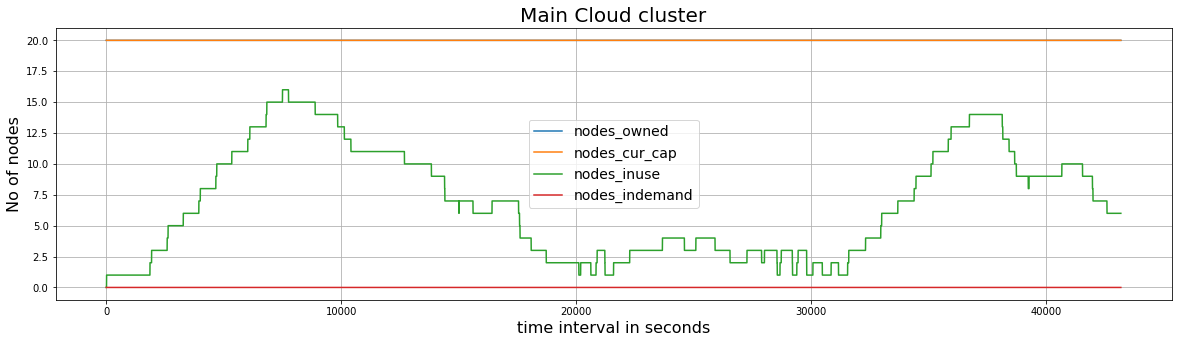

In [5]:
#node_usage_graph(cld_b4_n, 'CLOUD Before changes')
node_usage_graph(hpc_main, 'Main HPC cluster')
#node_usage_graph(cld_b4_n, 'CLOUD Before changes')
node_usage_graph(bgd_main, 'Main Bigdata cluster')

node_usage_graph(cld_main, 'Main Cloud cluster')



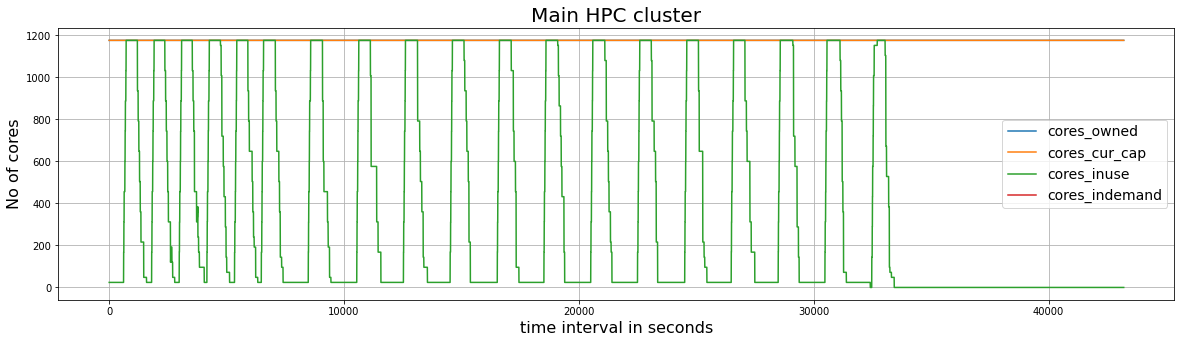

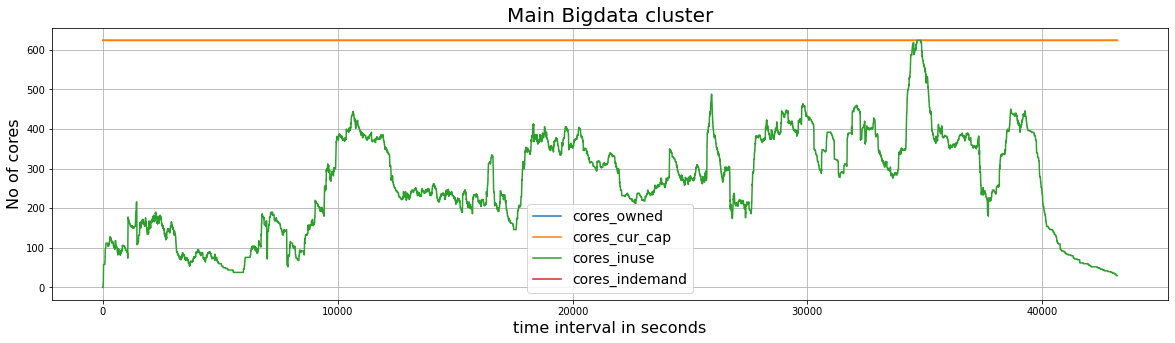

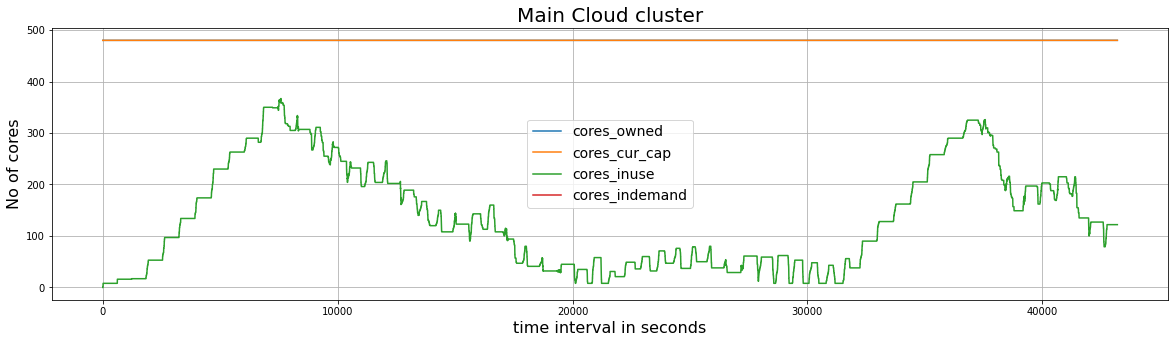

In [6]:
#node_usage_graph(cld_b4_n, 'CLOUD Before changes')
core_usage_graph(hpc_main, 'Main HPC cluster')
#node_usage_graph(cld_b4_n, 'CLOUD Before changes')
core_usage_graph(bgd_main, 'Main Bigdata cluster')

core_usage_graph(cld_main, 'Main Cloud cluster')




In [7]:
def dc_coreusage_graph(data, title):
    coreusage = data[['timestamp', 'all_cores', 'cores_inuse']]
    ax = coreusage.set_index('timestamp').plot(figsize=(20, 5))
    plt.xlabel('time interval in seconds', fontsize=16)
    plt.ylabel('No of cores', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(loc='best', fontsize=14)
    plt.grid()
    plt.show()
    
def dc_nodeusage_graph(data, title):
    coreusage = data[['timestamp', 'all_nodes', 'nodes_inuse']]
    ax = coreusage.set_index('timestamp').plot(figsize=(20, 5))
    plt.xlabel('time interval in seconds', fontsize=16)
    plt.ylabel('No of cores', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(loc='best', fontsize=14)
    plt.grid()
    plt.show()
    
def dc_cputime_graph(data, title):
    coreusage = data[['timestamp', 'percent_all_cputime', 'percent_used_cputime', 'percent_utilization']]
    ax = coreusage.set_index('timestamp').plot(figsize=(20, 5))
    plt.xlabel('time interval in seconds', fontsize=16)
    plt.ylabel('No of cores', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(loc='best', fontsize=14)
    plt.grid()
    plt.show()
    
    

data = cld_main[['timestamp']]
dc = pd.DataFrame(data)
dc['timestamp'] = cld_main['timestamp']
dc['cores_inuse'] = cld_main['cores_inuse']+bgd_main['cores_inuse']+hpc_main['cores_inuse']
dc['all_cores'] = cld_main['cores_cur_cap']+bgd_main['cores_cur_cap']+hpc_main['cores_cur_cap']
dc['all_nodes'] = dc['all_cores']/24
dc['nodes_inuse'] = dc.apply(lambda row: math.ceil(row.cores_inuse/24), axis=1) 
#dc['all_cputime'] = dc.apply(lambda row: row.all_cores if row.timestamp == 0 else (row.all_cores * row.timestamp))
dc['all_cputime'] = dc.apply(lambda row: 1 if row.timestamp == 0 else row.all_cores * row.timestamp, axis=1)
dc['used_cputime'] = dc.apply(lambda row: row.cores_inuse * row.timestamp, axis=1)
dc['percent_cputime'] = dc.apply(lambda row: (row.used_cputime / row.all_cputime)*100, axis=1)
dc['percent_used_cputime'] = dc['percent_cputime'].round(decimals = 2)
dc['percent_all_cputime'] = dc.apply(lambda row: (row.all_cputime / row.all_cputime)*100, axis=1)
dc['cu_utilization'] = dc['cores_inuse'].cumsum()
dc['percent_utilization'] = dc.apply(lambda row: 1 if row.timestamp == 0 else (row.cu_utilization / row.all_cputime)*100, axis=1)

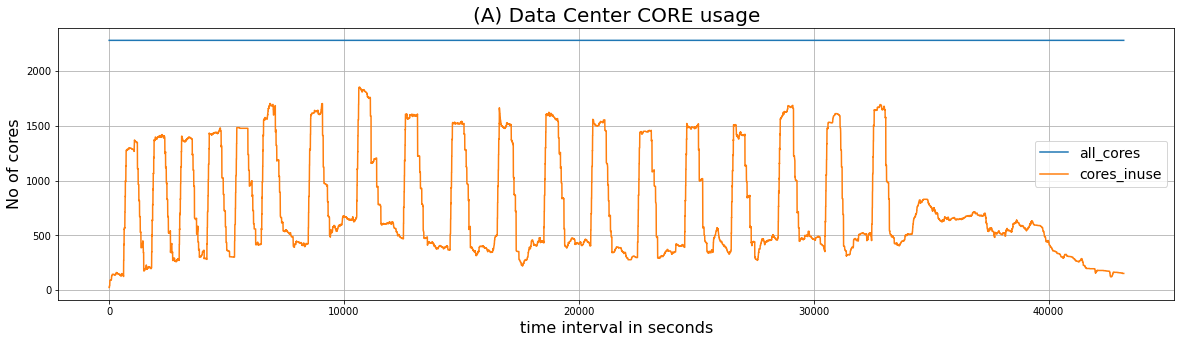

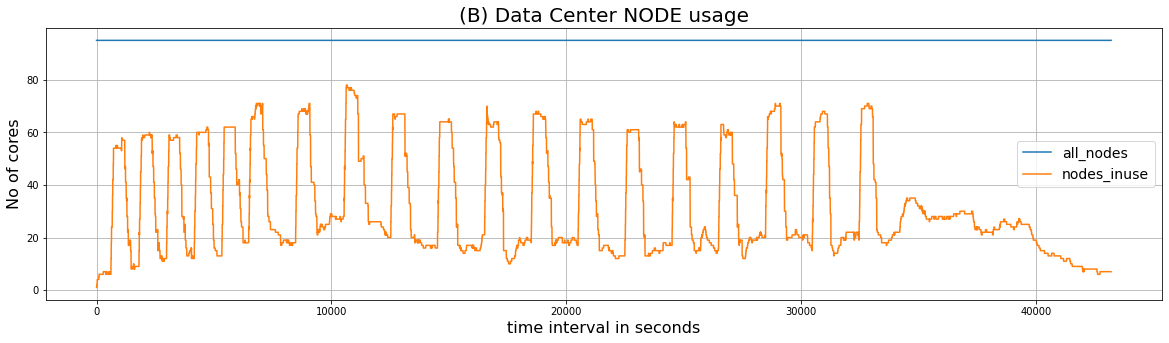

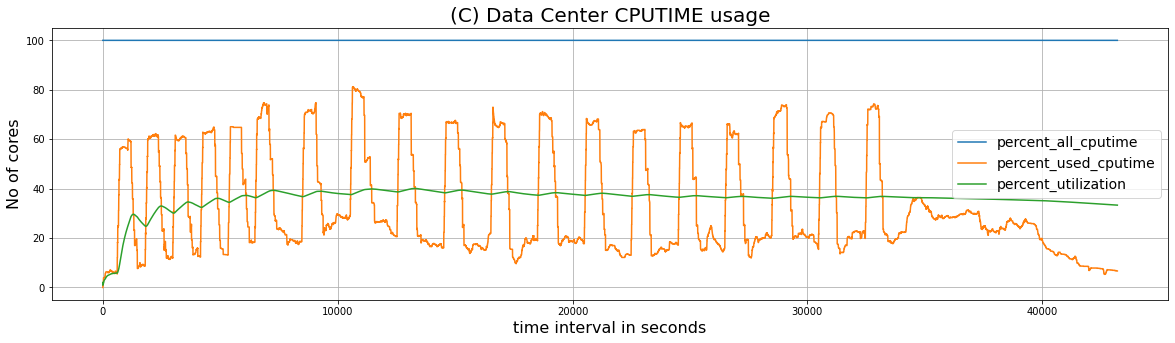

In [8]:
dc_coreusage_graph(dc, '(A) Data Center CORE usage')
dc_nodeusage_graph(dc, '(B) Data Center NODE usage')
dc_cputime_graph(dc, '(C) Data Center CPUTIME usage')


# Observations:
# Graph (A): Core Usage: Ideal usage, Almost impossible to replicate under real conditions. 
* Shows the cumulative core usage of all clusters. 
* It is ideal distribution (almost impossible ) to achieve under real conditions.
* To get such usage, all the clusters should be able to jam pack the jobs.
* Also it would mean that multi-core jobs can be run even when they are distributed across mulitple nodes.
    * Spark can do that
    * Ostack VM cannot do that. 
    * HPC needs full nodes. 
    
# Graph (B): Node usage: Ideal allocation. 
* Shows number of nodes in use that can serve all three clusters and fulfill all the job requirements.
* Again assumes same things as above and hence is impossible to achieve in the real world scenario. 


## Observations about silo experiemnt from graph (C) 
* Blue line shows total cpu time available.
* Orange line shows the cpu time as used by all the clusters combined.
* Green line shows the percentage utilization of the data-center at any given time.

## Silo requires 95 nodes (24 cores per node) but if they co-operate 42 nodes is enough (ideally):
* To be able to successfully run all the jobs in all clusters.
* If the clusters work together than they all can complete their jobs with 42 nodes. 

# What is the efficiency of FLOCX ?
* What is the best leasing time and movement time to be able to fulfill all the job requirements ?
* What is the frequency of auction that would yeild maximum jobs done with less hardware ?






**Will add here more as new results are available**

# ** END OF NOTEBOOK **

In [9]:
dc.head()

,timestamp,cores_inuse,all_cores,all_nodes,nodes_inuse,all_cputime,used_cputime,percent_cputime,percent_used_cputime,percent_all_cputime,cu_utilization,percent_utilization
0,0,24.0,2280,95.0,1,1.0,0.0,0.000000,0.00,100.0,24.0,1.000000
1,1,24.0,2280,95.0,1,2280.0,24.0,1.052632,1.05,100.0,48.0,2.105263
2,2,24.0,2280,95.0,1,4560.0,48.0,1.052632,1.05,100.0,72.0,1.578947
3,3,24.0,2280,95.0,1,6840.0,72.0,1.052632,1.05,100.0,96.0,1.403509
4,4,24.0,2280,95.0,1,9120.0,96.0,1.052632,1.05,100.0,120.0,1.315789


In [10]:
bgd_main.tail()

,timestamp,cluster,nodes_owned,nodes_borrowed,nodes_offered,nodes_cur_cap,nodes_inuse,nodes_indemand,jobs_waiting,jobs_running,jobs_done,jobs_rerun,cores_owned,cores_cur_cap,cores_inuse,cores_indemand
43195,43195,bigdata_main,26,0,0,26,9,0,11,15,4352,0,624,624,30,NaN
43196,43196,bigdata_main,26,0,0,26,9,0,11,15,4352,0,624,624,30,NaN
43197,43197,bigdata_main,26,0,0,26,9,0,11,15,4352,0,624,624,30,NaN
43198,43198,bigdata_main,26,0,0,26,9,0,11,15,4352,0,624,624,30,NaN
43199,43199,bigdata_main,26,0,0,26,9,0,11,15,4352,0,624,624,30,NaN


In [11]:
hpc_main.tail()

,timestamp,cluster,nodes_owned,nodes_borrowed,nodes_offered,nodes_cur_cap,nodes_inuse,nodes_indemand,jobs_waiting,jobs_running,jobs_done,jobs_rerun,cores_owned,cores_cur_cap,cores_inuse,cores_indemand
43195,43195,hpc_main,49,0,0,49,0,0,0,0,416,0,1176,1176,0,NaN
43196,43196,hpc_main,49,0,0,49,0,0,0,0,416,0,1176,1176,0,NaN
43197,43197,hpc_main,49,0,0,49,0,0,0,0,416,0,1176,1176,0,NaN
43198,43198,hpc_main,49,0,0,49,0,0,0,0,416,0,1176,1176,0,NaN
43199,43199,hpc_main,49,0,0,49,0,0,0,0,416,0,1176,1176,0,NaN


In [12]:
cld_main.tail()

,timestamp,cluster,nodes_owned,nodes_borrowed,nodes_offered,nodes_cur_cap,nodes_inuse,nodes_indemand,jobs_waiting,jobs_running,jobs_done,jobs_rerun,cores_owned,cores_cur_cap,cores_inuse,cores_indemand
43195,43195,cloud50,20,0,0,20,6,0,0,35,784,0,480,480,122.0,NaN
43196,43196,cloud50,20,0,0,20,6,0,0,35,784,0,480,480,122.0,NaN
43197,43197,cloud50,20,0,0,20,6,0,0,35,784,0,480,480,122.0,NaN
43198,43198,cloud50,20,0,0,20,6,0,0,35,784,0,480,480,122.0,NaN
43199,43199,cloud50,20,0,0,20,6,0,0,35,784,0,480,480,122.0,NaN
